 # Question 1
 - Learn and understand Zipf’s Law.  
 - Pick any file (or files) in NLTK package.  
 - Prove if Zipf’s Law works in Natural Language or not.  
 - REQUIREMNTS: (Must Do)  Use ’glob’ to open and read file. 
       - If read multiple files use LOOP to achieve.  
       - Create at least one function and one lambda function.  
       - Save your data as an CSV file contains (Word, Rank, Frequency) with TITLE and Sort it by RANK.  
       - Open your CSV file, generate a log-log figure according to the data you saved.  
       - Write a conclusion at the end of your code base on your figure. 

# Zipf's Law Definition:
- Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely   proportional to its rank in the frequency table.

In [1]:
from nltk.corpus import webtext        #Importing webtext module 
import matplotlib.pyplot as plt        #Iporting matplot lib to use loglog figure
import glob                            #Importing glob function to read and write the files
import csv                             #Importing the CSV module to read and write the data in CSV file

In [2]:
webtext_file=glob.glob(r'webtext/*.txt')

words_frequency={}                                                     #Empty dictionary to store words and its frequency
for file in webtext_file:                                 
    with open(file,'r') as f:                                     #Open webtext files in read mode
        read_file=f.read()                                        #Assigned a variable to sotore the content from files
        lower_words=read_file.lower()                             #Convert the content to lower case
        words = lower_words.split()                               #Split() function separates the words with whitespace and add it to the words list
    for word in words:
        if word.isalpha():                                        #Checking if the word is an alphabet
            if word not in words_frequency:                       #Checking if the word already exist in the dictionary
                words_frequency[word] = 1                         #If words doen't exist assign it a value 1
            else:
                words_frequency[word] += 1                        #For existing words increment the count by 1
sorted_words=sorted(words_frequency.items(), key=lambda x: x[1], reverse=True)   #Use of lambda function to sort the words in descending order of their frequency
print(sorted_words[:20])                                         

[('the', 7733), ('to', 6232), ('a', 6072), ('i', 6033), ('you', 4530), ('and', 4360), ('in', 4131), ('of', 3156), ('on', 3114), ('is', 2873), ('not', 2551), ('with', 1886), ('that', 1882), ('for', 1830), ('when', 1809), ('it', 1809), ('girl', 1558), ('my', 1534), ('have', 1373), ('but', 1356)]


In [3]:
def write_file():                                                              #Defined a function to write the files in csv.
    rank=1                                                                     #Assigned a variable rank with ots value=1
    csvfile=open(r'zipf_file.csv', 'w',newline="")#Created and opened a csv file with write option.
    write=csv.writer(csvfile)                                                 
    write.writerow(['Rank','Words','Frequency'])                              #Add a heading to our csvfile
    for words in sorted_words:
        write.writerow([rank,words[0],words[1]])                             #Add the contents row by row from the file
        rank+=1                                                               #Increment rank by 1 for every new row
    csvfile.close()                                                           #Close the csv file

In [4]:
write_file()                                  #Calling write_file function to create a csv file on the specified path

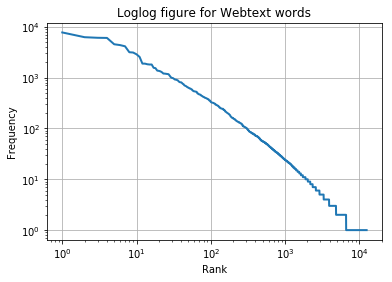

In [5]:
csvfile=open(r'zipf_file.csv', 'r') #Open csv file with read command
rank=[]                                                          #Declared an empty list to store rank
word=[]                                                          #Empty list to store words
frequency=[]                                                     #Empty list to store Frequency
csv_f=csv.reader(csvfile)                                        #Read the csv file using reader function
for columns in csv_f:
    rank.append(columns[0])                                      #Append Rank column to Rank list
    word.append(columns[1])                                      #Append Word column to word list
    frequency.append(columns[2])                                 #Append Frequency column to Frequency list
rank.pop(0)                                                      #Pop out heading 'Rank' from the list
frequency.pop(0)                                                 #Pop out heading 'Frequency' from the list
plt.loglog(rank,frequency,linewidth=2)                                       #Ploting loglog graph with rank on x axis and frequency on y
plt.grid(True)                                                   #Enable grid option 
plt.title("Loglog figure for Webtext words")                     #Providing title for the graph
plt.xlabel("Rank")                                               #Assigning lable to X-axis
plt.ylabel("Frequency")                                          #Assigning lable to Y-axis
plt.show()                                                       #Display the plot

# Conclusion:
- The loglog figure based on the webtext words follows the zipf's law as the frequency of "the" word is highest in the webtext words and it is inversaly proportional to its rank in Frequency table.
- Hence Proved!!